In [21]:
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = False
import numpy as np, scipy as sp

In [22]:
DECAY_VAL = .04
def sinc(scale, decay, x):
    return scale*np.sin(x)*np.exp(-1*decay*x*x)

First Derivative

In [23]:
def deriv_forward(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_now = sinc(1, DECAY_VAL, x)
        func_prev = sinc(1, DECAY_VAL, x-h)
        #derivative evaluation
        deriv[i] = (func_now-func_prev)/h
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [24]:
def deriv_backward(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_now = sinc(1, DECAY_VAL, x+h)
        func_prev = sinc(1, DECAY_VAL, x)
        #derivative evaluation
        deriv[i] = (func_now-func_prev)/h
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [25]:
def deriv_central(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_now = sinc(1, DECAY_VAL, x+h)
        func_prev = sinc(1, DECAY_VAL, x-h)
        #derivative evaluation
        deriv[i] = (func_now-func_prev)/(2*h)
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

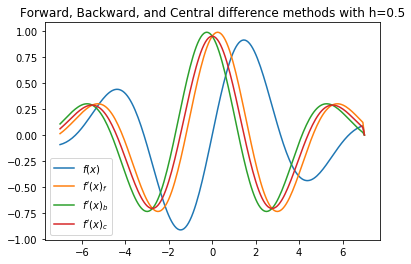

In [26]:
data_f = deriv_forward(0.5,200,-7,+7)
data_b = deriv_backward(0.5,200,-7,+7)
data_c = deriv_central(0.5,200,-7,+7)
xval = np.linspace(-7,7,200)
plt.title("Forward, Backward, and Central difference methods with h=0.5")
plt.plot(xval,data_f[0])
plt.plot(xval,data_f[1])
plt.plot(xval,data_b[1])
plt.plot(xval,data_c[1])
plt.legend(["$f(x)$","$f'(x)_f$","$f'(x)_b$","$f'(x)_c$"])

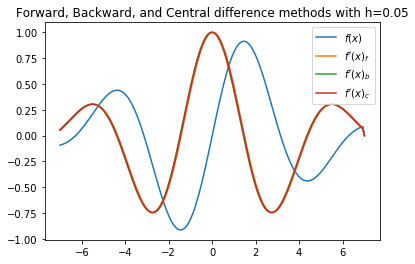

In [27]:
data_f = deriv_forward(0.05,200,-7,+7)
data_b = deriv_backward(0.05,200,-7,+7)
data_c = deriv_central(0.05,200,-7,+7)
xval = np.linspace(-7,7,200)
plt.title("Forward, Backward, and Central difference methods with h=0.05")
plt.plot(xval,data_f[0])
plt.plot(xval,data_f[1])
plt.plot(xval,data_b[1])
plt.plot(xval,data_c[1])
plt.legend(["$f(x)$","$f'(x)_f$","$f'(x)_b$","$f'(x)_c$"])

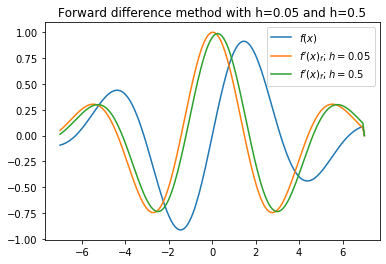

In [28]:
data_fp05 = deriv_forward(0.05,200,-7,+7)
data_fp5 = deriv_forward(0.5,200,-7,+7)
xval = np.linspace(-7,7,200)
plt.title("Forward difference method with h=0.05 and h=0.5")
plt.plot(xval,data_fp05[0])
plt.plot(xval,data_fp05[1])
plt.plot(xval,data_fp5[1])
plt.legend(["$f(x)$","$f'(x)_f$; $h=0.05$","$f'(x)_f$; $h=0.5$"])

Second Derivative

In [29]:
def second_deriv_f(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_ahead = sinc(1, DECAY_VAL, x+2*h)
        func_plus = sinc(1, DECAY_VAL, x+h)
        func_now = sinc(1, DECAY_VAL, x)
        #derivative evaluation
        deriv[i] = (func_ahead-2*func_plus+func_now)/(h*h)
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [30]:
def second_deriv_b(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_behind = sinc(1, DECAY_VAL, x-2*h)
        func_minus = sinc(1, DECAY_VAL, x-h)
        func_now = sinc(1, DECAY_VAL, x)
        #derivative evaluation
        deriv[i] = (func_now-2*func_minus+func_behind)/(h*h)
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

In [31]:
def second_deriv_c(h, steps, xmin, xmax):
    deriv = np.zeros(steps)
    function = np.zeros(steps)
    delta = (xmax-xmin)/(steps-1)
    for i in range(0,steps-1):
        x = i*delta+xmin
        #function evaluation
        func_plus = sinc(1, DECAY_VAL, x+h)
        func_minus = sinc(1, DECAY_VAL, x-h)
        func_now = sinc(1, DECAY_VAL, x)
        #derivative evaluation
        deriv[i] = (func_plus-2*func_now+func_minus)/(h*h)
        function[i] = sinc(1, DECAY_VAL, x)
    return function,deriv 

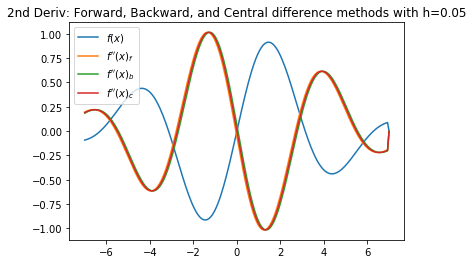

In [32]:
data_f = second_deriv_f(0.05,200,-7,+7)
data_b = second_deriv_b(0.05,200,-7,+7)
data_c = second_deriv_c(0.05,200,-7,+7)
xval = np.linspace(-7,7,200)
plt.title("2nd Deriv: Forward, Backward, and Central difference methods with h=0.05")
plt.plot(xval,data_f[0])
plt.plot(xval,data_f[1])
plt.plot(xval,data_b[1])
plt.plot(xval,data_c[1])
plt.legend(["$f(x)$","$f''(x)_f$","$f''(x)_b$","$f''(x)_c$"])